In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, CoxPHFitter

In [3]:
data = pd.read_csv("../data/raw/turnover.csv")
data.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1129 non-null   float64
 1   event         1129 non-null   int64  
 2   gender        1129 non-null   object 
 3   age           1129 non-null   float64
 4   industry      1129 non-null   object 
 5   profession    1129 non-null   object 
 6   traffic       1129 non-null   object 
 7   coach         1129 non-null   object 
 8   head_gender   1129 non-null   object 
 9   greywage      1129 non-null   object 
 10  way           1129 non-null   object 
 11  extraversion  1129 non-null   float64
 12  independ      1129 non-null   float64
 13  selfcontrol   1129 non-null   float64
 14  anxiety       1129 non-null   float64
 15  novator       1129 non-null   float64
dtypes: float64(7), int64(1), object(8)
memory usage: 141.3+ KB


## Cox Proportional Hazards Modes

In [5]:
data_dummies = pd.get_dummies(data, columns = ["gender", "industry", "profession", "traffic", "coach", "head_gender", "greywage", "way"], drop_first = True)
data_dummies.head()

,stag,event,age,extraversion,independ,selfcontrol,anxiety,novator,gender_m,industry_Agriculture,...,traffic_rabrecNErab,traffic_recNErab,traffic_referal,traffic_youjs,coach_no,coach_yes,head_gender_m,greywage_white,way_car,way_foot
0,7.030801,1,35.0,6.2,4.1,5.7,7.1,8.3,True,False,...,True,False,False,False,True,False,False,True,False,False
1,22.965092,1,33.0,6.2,4.1,5.7,7.1,8.3,True,False,...,False,False,False,False,True,False,True,True,False,False
2,15.934292,1,35.0,6.2,6.2,2.6,4.8,8.3,False,False,...,True,False,False,False,True,False,True,True,False,False
3,15.934292,1,35.0,5.4,7.6,4.9,2.5,6.7,False,False,...,True,False,False,False,True,False,True,True,False,False
4,8.410678,1,32.0,3.0,4.1,8.0,7.1,3.7,True,False,...,False,False,False,True,False,True,False,True,False,False


In [6]:
cph = CoxPHFitter()
cph.fit(data_dummies, duration_col='stag', event_col='event')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1129 total observations, 558 right-censored observations>
             duration col = 'stag'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 1129
number of events observed = 571
   partial log-likelihood = -3385.27
         time fit was run = 2025-03-29 03:23:14 UTC

---
                                coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                       
age                             0.02      1.02      0.01            0.01            0.04                1.01                1.04
extraversion                    0.02      1.02      0.04           -0.05            0.09                0.95                1.09
independ                       -0.01      0.99      0.04           -0.08            0.06                0.92                1.06
selfcontrol                    -0.05      0.95      0.04           -0.12            0.02                0.89                1.02
anxiety                        -0.05      0.95      0.03           -0.12            0.01                0.89                1.01
novator                         0.01      1.01      0.03           -0.05            0.07                0.95                1.07
gender_m                       -0.11      0.90      0.13           -0.36            0.14                0.70                1.15
industry_Agriculture            0.66      1.93      0.55           -0.41            1.73                0.66                5.61
industry_Banks                  0.41      1.51      0.44           -0.45            1.27                0.64                3.55
industry_Building               0.43      1.53      0.46           -0.48            1.33                0.62                3.79
industry_Consult                0.28      1.32      0.45           -0.61            1.16                0.54                3.20
industry_IT                    -0.53      0.59      0.45           -1.42            0.36                0.24                1.44
industry_Mining                 0.07      1.07      0.52           -0.95            1.08                0.39                2.94
industry_Pharma                -0.23      0.79      0.53           -1.27            0.81                0.28                2.26
industry_PowerGeneration       -0.26      0.77      0.50           -1.24            0.72                0.29                2.05
industry_RealEstate            -1.06      0.35      0.63           -2.29            0.18                0.10                1.20
industry_Retail                -0.33      0.72      0.43           -1.18            0.51                0.31                1.67
industry_State                  0.01      1.01      0.48           -0.93            0.94                0.39                2.57
industry_Telecom               -0.52      0.59      0.50           -1.51            0.46                0.22                1.59
industry_etc                    0.09      1.09      0.44           -0.78            0.96                0.46                2.61
industry_manufacture           -0.14      0.87      0.44           -0.99            0.72                0.37                2.05
industry_transport             -0.19      0.83      0.49           -1.15            0.78                0.32                2.18
profession_BusinessDevelopment  0.60      1.82      0.51           -0.40            1.59                0.67                4.92
profession_Commercial           0.96      2.61      0.51           -0.03            1.95                0.97                7.06
profession_Consult              0.58      1.79      0.52           -0.44            1.60                0.65                4.96
profession_Engineer             1.01      2.75      0.54           -0.04            2.07                0.96                7.90
profession_Finance          

### Significance of the variable
Tests if the coefficient is significantly different from 0.  
p < 0.1 → The variable significantly impacts survival.  
p ≥ 0.1 → No strong evidence that the variable affects survival.  

The following variables show strong evidence that they affect survival:  
* age                   ->  <0.005  
* industry_RealEstate   ->  0.09
* profession_Comercial  ->  0.06
* profession_Engineer   ->  0.06
* profession_manage     ->  0.01
* traffic_empjs         ->  <0.005
* traffic_rabrecNErab   ->  0.07
* traffic_youjs         ->  0.02
* greywage_white        ->  <0.005
* way_car               ->  0.09
* way_foot              ->  0.03

### Hazard Ratio: 
HR > 1 → The variable increases the hazard (higher risk of the event happening sooner).  
HR < 1 → The variable decreases the hazard (protective effect, longer survival time).  
HR ≈ 1 → No effect on survival.  

* age                   ->  1.02  -  each additional year increases risk by 2%.  
* industry_RealEstate   ->  0.35  -  people coming from real state have a lower risk.
* profession_Commercial  ->  2.61  -  people that have Commerce as Profession have a high risk.
* profession_Engineer   ->  2.45  -  people that have Engineering as Profession have a high risk.
* profession_manage     ->  3.60  -  people that have Management as Profession have a high risk.
* traffic_empjs         ->  2.10  -  people that come to the company via recruiter contact in job site have a high risk.
* traffic_rabrecNErab   ->  1.44  -  people that come to the company via recommendation have a high risk.
* traffic_youjs         ->  1.63  -  people that come to the company via application in job site have a high risk. 
* greywage_white        ->  0.61  -  people whose salary is fully declared have a lower risk.
* way_car               ->  0.84  -  people that comute to the work using car have a lower risk.
* way_foot              ->  0.68  -  people that comute to the work walking have a lower risk.

## Kaplan Meier Survival Analysis

In [7]:
kmf = KaplanMeierFitter()
kmf.fit(data['stag'], event_observed=data['event'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1129 total observations, 558 right-censored observations>

In [8]:
prob_1 = 0.75
prob_2 = 0.6

In [9]:
survival_func = kmf.survival_function_
closest_index1 = (survival_func["KM_estimate"] - prob_1).abs().idxmin()
closest_index2 = (survival_func["KM_estimate"] - prob_2).abs().idxmin()
time_prob_1 = round(closest_index1)
time_prob_2 = round(closest_index2)

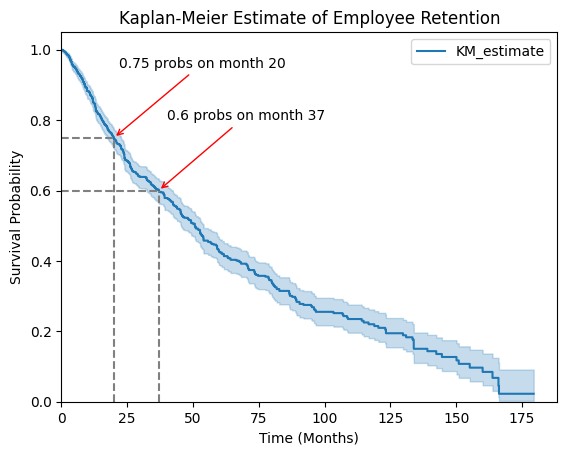

In [10]:
kmf.plot_survival_function()
plt.title("Kaplan-Meier Estimate of Employee Retention")
plt.xlabel("Time (Months)")
plt.ylabel("Survival Probability")
plt.hlines(y = prob_1, xmin = 0, xmax = time_prob_1, color = "gray", linestyle = "--")
plt.vlines(x = time_prob_1, ymin = 0, ymax = prob_1, color = "gray", linestyle = "--")
plt.hlines(y = prob_2, xmin = 0, xmax = time_prob_2, color = "gray", linestyle = "--")
plt.vlines(x = time_prob_2, ymin = 0, ymax = prob_2, color = "gray", linestyle = "--")
plt.annotate(f"{prob_1} probs on month {time_prob_1}", 
             xy=(time_prob_1, prob_1), 
             xytext=(time_prob_1 + 2, prob_1 + 0.2), 
             arrowprops=dict(arrowstyle = "->", color = 'red'))
plt.annotate(f"{prob_2} probs on month {time_prob_2}", 
             xy=(time_prob_2, prob_2), 
             xytext=(time_prob_2 + 3, prob_2 + 0.2), 
             arrowprops=dict(arrowstyle = "->", color = 'red'))
plt.xlim(0)
plt.ylim(0)
plt.show()

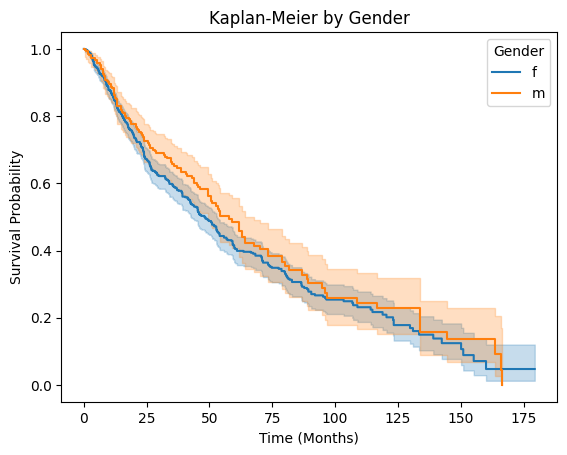

In [11]:
for gender, grouped_df in data.groupby('gender'):
    kmf.fit(grouped_df['stag'], event_observed=grouped_df['event'], label=gender)
    kmf.plot_survival_function()

plt.title("Kaplan-Meier by Gender")
plt.xlabel("Time (Months)")
plt.ylabel("Survival Probability")
plt.legend(title="Gender")
plt.show()

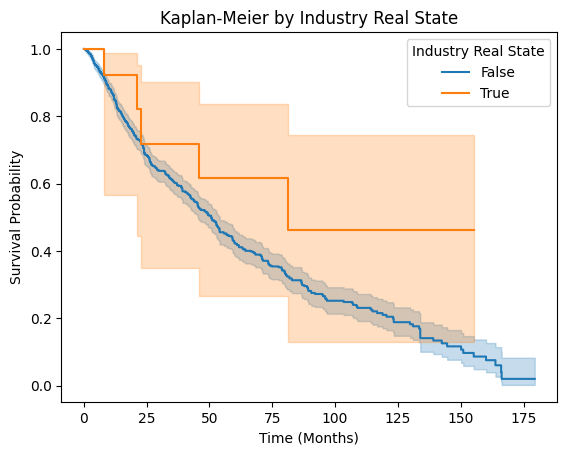

In [12]:
for rs, grouped_df in data_dummies.groupby('industry_RealEstate'):
    kmf.fit(grouped_df['stag'], event_observed=grouped_df['event'], label=rs)
    kmf.plot_survival_function()

plt.title("Kaplan-Meier by Industry Real State")
plt.xlabel("Time (Months)")
plt.ylabel("Survival Probability")
plt.legend(title="Industry Real State")
plt.show()

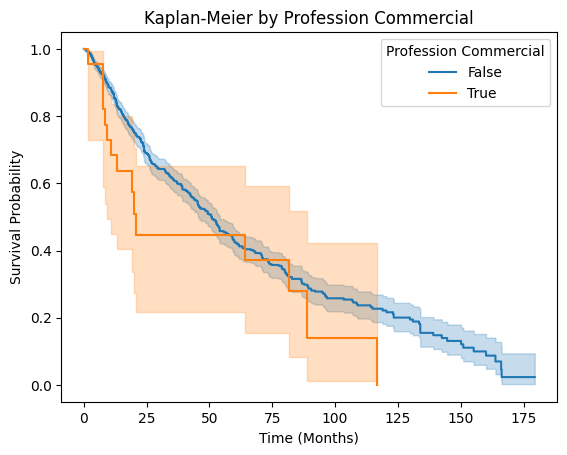

In [13]:
for pc, grouped_df in data_dummies.groupby('profession_Commercial'):
    kmf.fit(grouped_df['stag'], event_observed=grouped_df['event'], label=pc)
    kmf.plot_survival_function()

plt.title("Kaplan-Meier by Profession Commercial")
plt.xlabel("Time (Months)")
plt.ylabel("Survival Probability")
plt.legend(title="Profession Commercial")
plt.show()

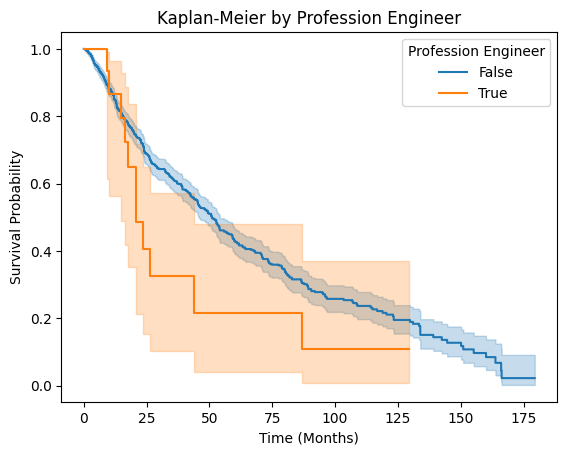

In [14]:
for pc, grouped_df in data_dummies.groupby('profession_Engineer'):
    kmf.fit(grouped_df['stag'], event_observed=grouped_df['event'], label=pc)
    kmf.plot_survival_function()

plt.title("Kaplan-Meier by Profession Engineer")
plt.xlabel("Time (Months)")
plt.ylabel("Survival Probability")
plt.legend(title="Profession Engineer")
plt.show()

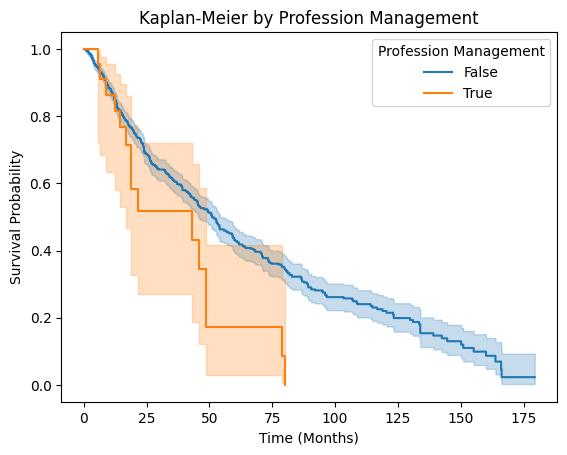

In [15]:
for pc, grouped_df in data_dummies.groupby('profession_manage'):
    kmf.fit(grouped_df['stag'], event_observed=grouped_df['event'], label=pc)
    kmf.plot_survival_function()

plt.title("Kaplan-Meier by Profession Management")
plt.xlabel("Time (Months)")
plt.ylabel("Survival Probability")
plt.legend(title="Profession Management")
plt.show()

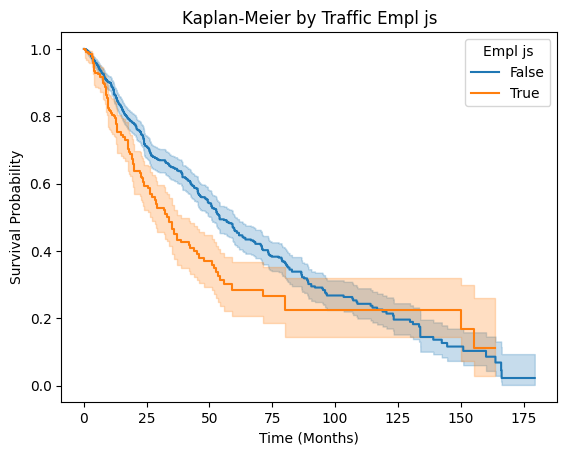

In [16]:
for pc, grouped_df in data_dummies.groupby('traffic_empjs'):
    kmf.fit(grouped_df['stag'], event_observed=grouped_df['event'], label=pc)
    kmf.plot_survival_function()

plt.title("Kaplan-Meier by Traffic Empl js")
plt.xlabel("Time (Months)")
plt.ylabel("Survival Probability")
plt.legend(title="Empl js")
plt.show()

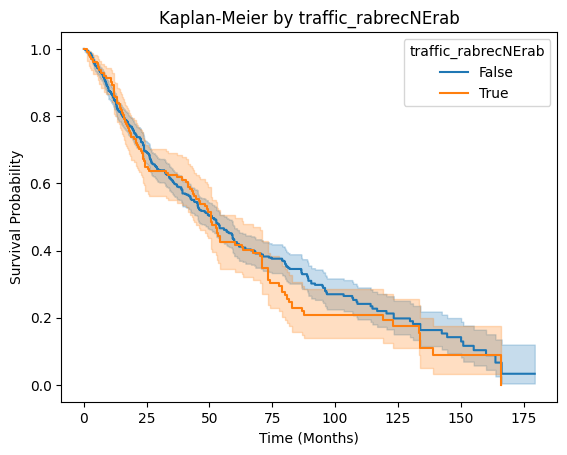

In [17]:
for pc, grouped_df in data_dummies.groupby('traffic_rabrecNErab'):
    kmf.fit(grouped_df['stag'], event_observed=grouped_df['event'], label=pc)
    kmf.plot_survival_function()

plt.title("Kaplan-Meier by traffic_rabrecNErab")
plt.xlabel("Time (Months)")
plt.ylabel("Survival Probability")
plt.legend(title="traffic_rabrecNErab")
plt.show()

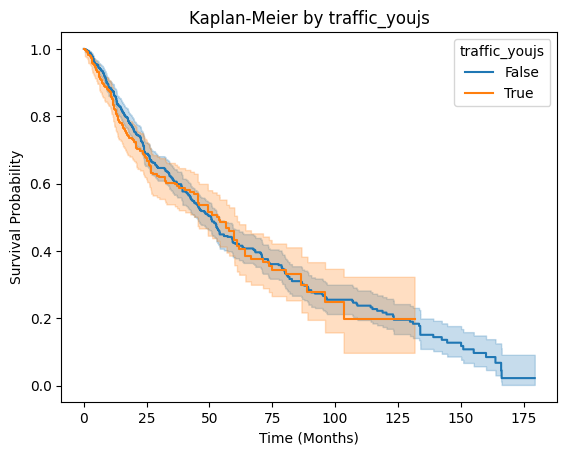

In [18]:
for pc, grouped_df in data_dummies.groupby('traffic_youjs'):
    kmf.fit(grouped_df['stag'], event_observed=grouped_df['event'], label=pc)
    kmf.plot_survival_function()

plt.title("Kaplan-Meier by traffic_youjs")
plt.xlabel("Time (Months)")
plt.ylabel("Survival Probability")
plt.legend(title="traffic_youjs")
plt.show()

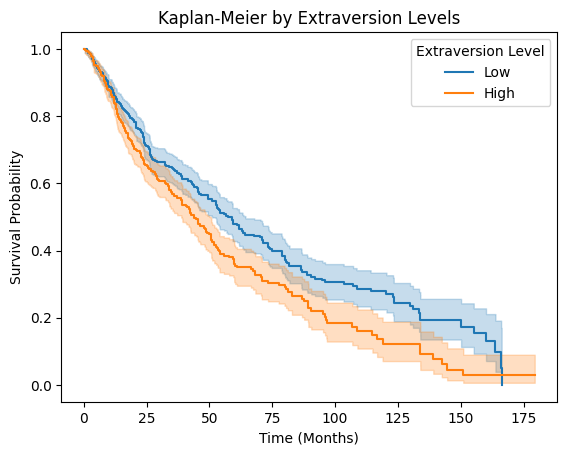

In [19]:
data['extraversion_group'] = pd.qcut(data['extraversion'], q=2, labels=['Low', 'High'])

for group, grouped_df in data.groupby('extraversion_group', observed = False):
    kmf.fit(grouped_df['stag'], event_observed=grouped_df['event'], label=group)
    kmf.plot_survival_function()

plt.title("Kaplan-Meier by Extraversion Levels")
plt.xlabel("Time (Months)")
plt.ylabel("Survival Probability")
plt.legend(title="Extraversion Level")
plt.show()

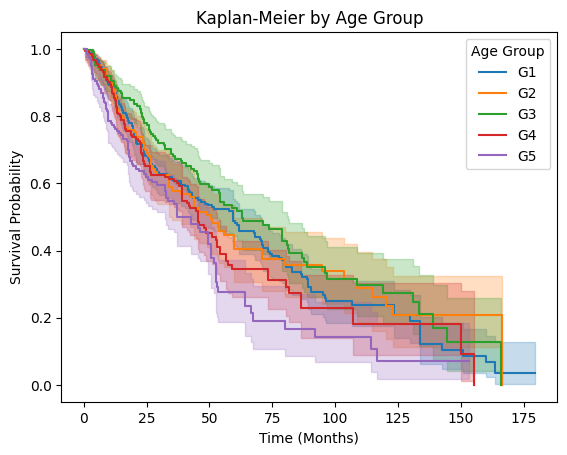

In [20]:
data['age_group'] = pd.qcut(data['age'], q = 5, labels = ["G1", "G2", "G3", "G4", "G5"])

for group, grouped_df in data.groupby('age_group', observed = False):
    kmf.fit(grouped_df['stag'], event_observed=grouped_df['event'], label=group)
    kmf.plot_survival_function()

plt.title("Kaplan-Meier by Age Group")
plt.xlabel("Time (Months)")
plt.ylabel("Survival Probability")
plt.legend(title="Age Group")
plt.show()

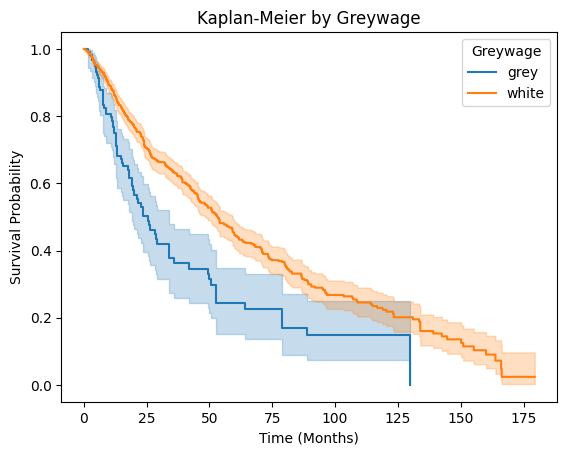

In [21]:
for greywage, grouped_df in data.groupby('greywage'):
    kmf.fit(grouped_df['stag'], event_observed=grouped_df['event'], label = greywage)
    kmf.plot_survival_function()

plt.title("Kaplan-Meier by Greywage")
plt.xlabel("Time (Months)")
plt.ylabel("Survival Probability")
plt.legend(title="Greywage")
plt.show()

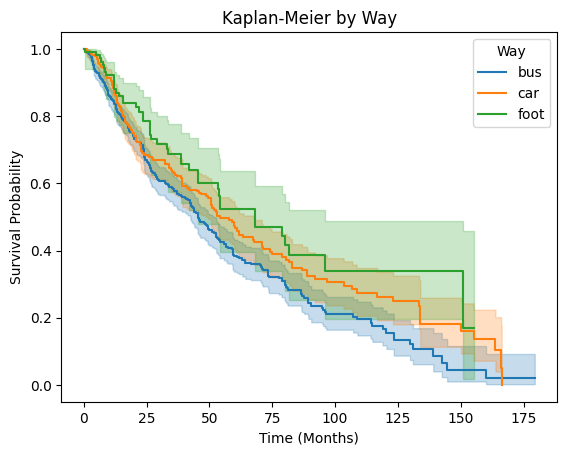

In [22]:
for way, grouped_df in data.groupby('way'):
    kmf.fit(grouped_df['stag'], event_observed=grouped_df['event'], label = way)
    kmf.plot_survival_function()

plt.title("Kaplan-Meier by Way")
plt.xlabel("Time (Months)")
plt.ylabel("Survival Probability")
plt.legend(title="Way")
plt.show()